<a href="https://colab.research.google.com/github/hafizaiqra736/iqraolympics/blob/main/iqraolyphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Nagano 1998 Olympics Nations Medals.csv', 'Sydney 2000 Olympics Nations Medals.csv', 'Vancouver 2010 Olympics Nations Medals.csv', 'PyeongChang 2018 Olympics Nations Medals.csv', 'Rio 2016 Olympics Nations Medals.csv', 'Lillehammer 1994 Olympics Nations Medals.csv', 'Tokyo 2020 Olympics Nations Medals.csv', 'London 2012 Olympics Nations Medals.csv', 'Paris 2024 Olympics_Nations Medals.csv', 'Olympic_Games_(1994-2024).db', 'SaltLakeCity 2002 Olympics Nations Medals.csv', 'Torino 2006 Olympics Nations Medals.csv', 'beijing_2022_Olympics_Nations_Medals.csv', 'Athens 2004 Olympics Nations Medals.csv', 'Sochi 2014 Olympics Nations Medals.csv', 'Atlanta 1996 Olympics Nations Medals.csv']
Tables in the database: [('SaltLakeCity_2002_Olympics_Nations_Medals',), ('Sochi_2014_Olympics_Nations_Medals',), ('Vancouver_2010_Olympics_Nations_Medals',), ('London_2012_Olympics_Nations_Medals',), ('Sydney_2000_Olympics_Nations_Medals',), ('Rio_2016_Olympics_Nations_Medals',), ('Paris_2024_Olympics_Nat

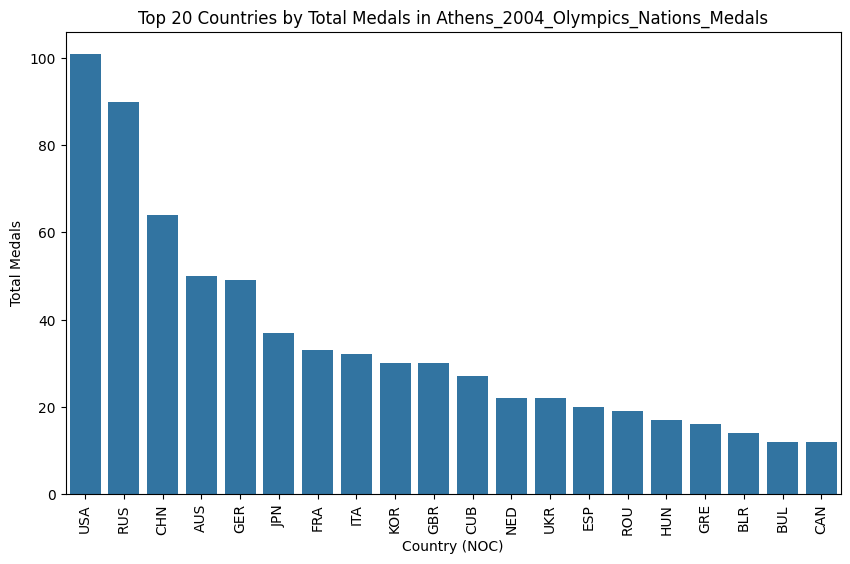

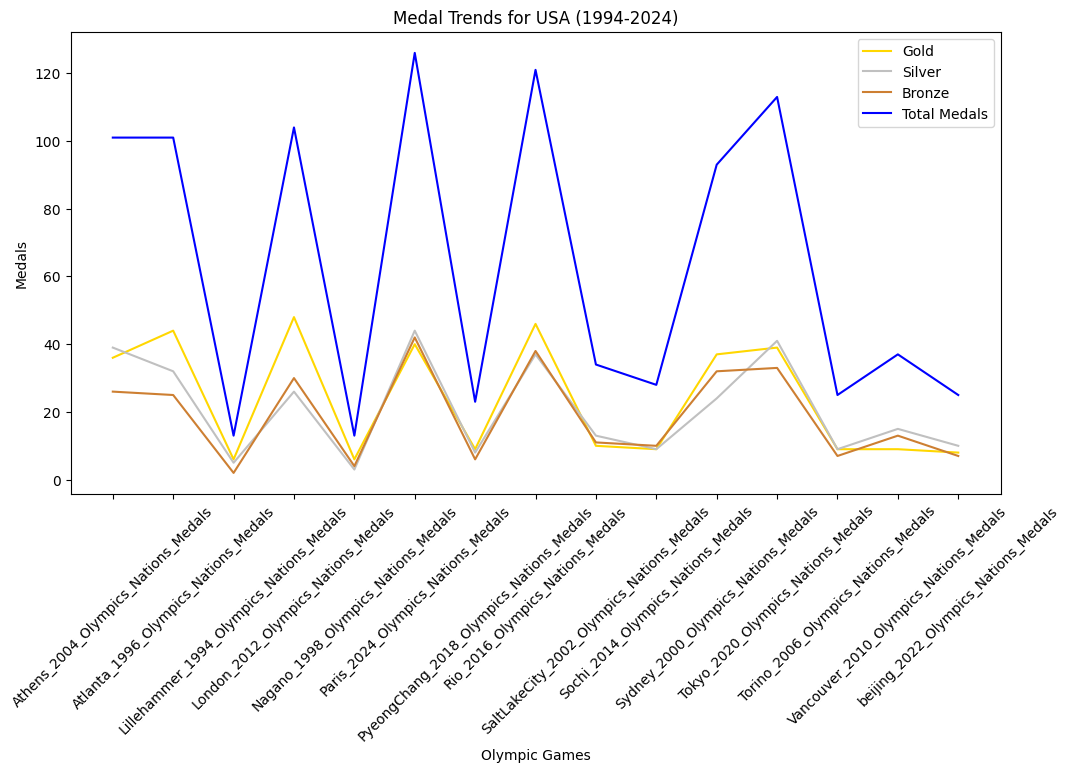

In [4]:
import os
import pandas as pd
import sqlite3
import zipfile

zip_path = '/content/archive (7).zip'
extract = '/content/data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract)

print(os.listdir(extract))
# Path to the extracted database file
db_path = '/content/data/Olympic_Games_(1994-2024).db'  # Update with the actual path to your .db file

# Dictionary to hold the dataframes for each Olympic Games
dataframes = {}

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Get a list of tables in the database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in the database:", tables)  # Print available tables

# Loop through each table and load it into the dataframes dictionary
for table_name_tuple in tables:
    table_name = table_name_tuple[0]
    dataframes[table_name] = pd.read_sql_query(f"SELECT * FROM '{table_name}'", conn)
    print(f'Loaded table "{table_name}" into DataFrame')
    print(dataframes[table_name].head())
    print(dataframes[table_name].info())
    print('-' * 40)

# Close the connection
conn.close()

# Combine all the DataFrames into one for overall analysis
all_medals_df = pd.concat(dataframes.values())

# Group by NOC to get total medals across all Olympic Games
total_medals_by_noc = all_medals_df.groupby('NOC').sum().reset_index()

# Sort by the total number of medals
total_medals_by_noc = total_medals_by_noc.sort_values(by='Total', ascending=False)

# Display the top 10 countries by total medals
print(total_medals_by_noc.head(10))

import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize medal distribution for a specific Olympics (e.g., 'Athens_2004')
olympic_year = 'Athens_2004_Olympics_Nations_Medals'  # Replace with any valid table name
medals_df = dataframes[olympic_year]

# Plot the medal distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='NOC', y='Total', data=medals_df.sort_values(by='Total', ascending=False).head(20))
plt.title(f'Top 20 Countries by Total Medals in {olympic_year}')
plt.xlabel('Country (NOC)')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
plt.show()

# Analyze trends in medal counts over time for a specific country
country_code = 'USA'  # Replace with any valid NOC code

# Extract the total medals for each Olympic Games for the specified country
medal_trends = pd.DataFrame()

for year, df in dataframes.items():
    country_medals = df[df['NOC'] == country_code][['Gold', 'Silver', 'Bronze', 'Total']]
    if not country_medals.empty:
        country_medals['Year'] = year
        medal_trends = pd.concat([medal_trends, country_medals])

# Plot the trends over time
medal_trends = medal_trends.sort_values(by='Year')
plt.figure(figsize=(12, 6))
plt.plot(medal_trends['Year'], medal_trends['Gold'], label='Gold', color='gold')
plt.plot(medal_trends['Year'], medal_trends['Silver'], label='Silver', color='silver')
plt.plot(medal_trends['Year'], medal_trends['Bronze'], label='Bronze', color='#cd7f32')
plt.plot(medal_trends['Year'], medal_trends['Total'], label='Total Medals', color='blue')
plt.title(f'Medal Trends for {country_code} (1994-2024)')
plt.xlabel('Olympic Games')
plt.ylabel('Medals')
plt.legend()
plt.xticks(rotation=45)
plt.show()


import plotly.express as px

# Filter the top 10 NOCs
top_10_nocs = total_medals_by_noc.sort_values(by='Total', ascending=False).head(10)['NOC'].tolist()

# Filter the data for the top 10 NOCs
top_10_nocs_data = all_medals_df[all_medals_df['NOC'].isin(top_10_nocs)]

# Assuming the year is present in the index, let's reset the index
top_10_nocs_data.reset_index(inplace=True)

# Create a line chart
fig = px.line(top_10_nocs_data, x='index', y='Total', color='NOC', markers=True,
             title='Medal Trends Over Time for Top 10 NOCs',
             labels={'index': 'Year', 'Total': 'Total Medals'},
             line_dash='NOC')

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Medals',
    legend_title='NOC',
    xaxis=dict(
        tickmode='linear',
        dtick=1  # Set x-axis ticks at each year
    ),
    yaxis=dict(
        title='Total Medals'
    )
)

# Show the plot
fig.show()

# Filter the top 10 NOCs
top_10_nocs = total_medals_by_noc.sort_values(by='Total', ascending=False).head(10)

# Create a bar chart with colorful bars
fig = px.bar(top_10_nocs, x='NOC', y='Total',
             title='Top 10 NOCs by Total Medals',
             labels={'NOC': 'NOC', 'Total': 'Total Medals'},
             color_discrete_sequence=px.colors.qualitative.Set3)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='NOC',
    yaxis_title='Total Medals',
    legend_title='NOC'
)

# Show the plot
fig.show()

# Create a bar chart with a rainbow color scheme
fig = px.bar(total_medals_by_noc, x='NOC', y='Total',
             title='Total Medals by NOC',
             labels={'NOC': 'NOC', 'Total': 'Total Medals'},
             color='Total', color_continuous_scale='viridis')

# Update layout for better appearance
fig.update_layout(
    xaxis_title='NOC',
    yaxis_title='Total Medals',
    coloraxis_colorbar=dict(title='Total Medals')
)

# Show the plot
fig.show()


# Get the top 10 NOCs by total medals
top_10_noc_medals = total_medals_by_noc.nlargest(10, 'Total')

# Create a bar chart with a rainbow color scheme
fig = px.bar(top_10_noc_medals, x='NOC', y='Total',
             title='Top 10 NOCs by Total Medals',
             labels={'NOC': 'NOC', 'Total': 'Total Medals'},
             color='Total', color_continuous_scale='viridis')

# Update layout for better appearance
fig.update_layout(
    xaxis_title='NOC',
    yaxis_title='Total Medals',
    coloraxis_colorbar=dict(title='Total Medals')
)

# Show the plot
fig.show()

import plotly.graph_objects as go

# Sample data (replace with your actual data)
years = [1994, 1996, 1998, 2000, 2002, 2004, 2006, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]
total_medals = [
    [15, 20, 25, 30, 35],
    [40, 45, 50, 55, 60],
    [65, 70, 75, 80, 85],
    [90, 95, 100, 105, 110],
    [38, 42, 48, 52, 58],
    [50, 55, 60, 65, 70],
    [25, 30, 35, 40, 45],
    [18, 22, 28, 32, 38],
    [40, 45, 50, 55, 60],
    [65, 70, 75, 80, 85],
    [35, 40, 45, 50, 55],
    [75, 80, 85, 90, 95],
    [55, 60, 65, 70, 75],
    [25, 30, 35, 40, 45],
    [45, 50, 55, 60, 65],
]

# Create a box plot for total medals by year
fig = go.Figure()

# Define a list of attractive colors
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FFD700', '#C77CFF', '#008080', '#FF9933', '#00FFFF', '#9933FF', '#FFCC00']

# Create a box plot for each year with color
for year, color, medals in zip(years, colors, total_medals):
    fig.add_trace(go.Box(
        y=medals,
        name=str(year),
        boxmean='sd',  # Show the mean and standard deviation
        marker=dict(color=color),  # Set the color of each box
        line=dict(color=color),  # Set the color of the box outline
        showlegend=False # Hide legend for each box
    ))

# Update layout
fig.update_layout(
    title='Box Plot of Total Medals by Year',
    xaxis_title='Year',
    yaxis_title='Total Medals',
    xaxis=dict(title='Year'),  # Add title to x-axis
    yaxis=dict(title='Total Medals'),  # Add title to y-axis
    font=dict(family='Arial', size=12, color='black'),  # Set font style
    autosize=True,
    plot_bgcolor='rgba(240,240,240,1)',  # Set background color of the plot
    paper_bgcolor='rgba(255,255,255,1)',  # Set background color of the paper
    showlegend=True,  # Show the legend
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255,255,255,0.5)',
        bordercolor='rgba(0,0,0,0)',  # Remove border from legend
        orientation='v',
        yanchor='top'
    )
)

# Show the interactive plot
fig.show()


